In [17]:
import os
import pandas as pd
import json
import matplotlib.pyplot as plt
import re
from collections import Counter
import numpy as np

os.chdir('C:/Users/tjame/Documents/Curious Learning')


In [8]:
gP =pd.read_csv("gameplay-March.csv")
eD = []
with open('user-engage-March.json', encoding = 'utf-8-sig', mode='r') as f:
    for line in f:
        eD.append(json.loads(line))

In [11]:
uniqueUsers = []
for i in eD:
    if i['user_pseudo_id'] not in uniqueUsers:
        uniqueUsers.append(i['user_pseudo_id'])

totalEngageTime = 0
for i in eD:    
    for j in i['event_params']:
        if (j['key'] == 'engagement_time_msec'):
            totalEngageTime = totalEngageTime + int(j['value']['int_value'])


       
engageInMins = totalEngageTime/(1000*60)
engageInHours = totalEngageTime/(1000*60*60)

#gameplay engagement time
eventTypes =[]
x =0
gameplayEngageTime=0
for i in eD:
    x=x+1
    for j in i['event_params']:
        if (j['key'] == 'engagement_time_msec'):
            time= int(j['value']['int_value'])
        if (j['key'] == 'firebase_screen'):
            gameplayEngageTime = gameplayEngageTime + time

            if(j['value']['string_value'] not in eventTypes):
                eventTypes.append(j['value']['string_value'])

eventTypes.sort()

gamePlayInMins = gameplayEngageTime/(1000*60)
gamePlayInHours = gameplayEngageTime/(1000*60*60)


print('The total engagement time in minutes was ' + str(round(engageInMins,2)) + ', of which ' + str(round(gamePlayInMins,2)) +
      ' of those minutes were for GamePlay events. \nThe total engagement time in hours was ' + 
      str(round(engageInHours,2))+ ', of which ' + str(round(gamePlayInHours,2)) +
      ' of those hours were for GamePlay events.')

The total engagement time in minutes was 47249.07, of which 46239.23 of those minutes were for GamePlay events. 
The total engagement time in hours was 787.48, of which 770.65 of those hours were for GamePlay events.


Text(0.5, 0, 'Number of hours')

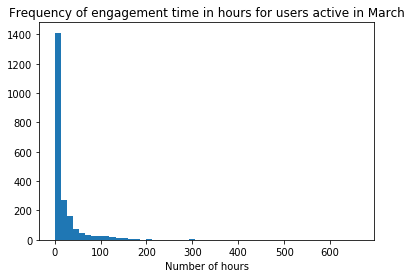

In [20]:
#engagement time for each user
userEngage = dict()
count = 0
while (count<len(uniqueUsers)):
    userEngage[uniqueUsers[count]] = 0
    count=count+1        


for i in uniqueUsers:
    for j in eD:
        for k in j['event_params']:
            if (k['key'] == 'engagement_time_msec'):
                time= int(k['value']['int_value'])
            if (k['key'] == 'firebase_screen'):
                if(j['user_pseudo_id'] == i):
                    userEngage[i] = userEngage[i]+ (time/(60*1000))
                else:
                    pass

#active users with 0 engagement time
nonActiveUsers=[]
for i in userEngage:
    if (userEngage[i] ==0):
        nonActiveUsers.append(i)


plt.hist(userEngage.values(), bins =50)
plt.title("Frequency of engagement time in hours for users active in March")
plt.xlabel("Number of hours")

Text(0.5, 0, 'Number of events completed')

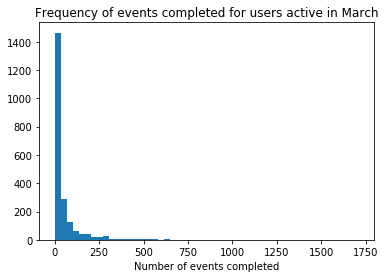

In [23]:
#dictionary of just user and all the events for that user 
        
usersInfo = dict()
usersInfo[gP.iloc[0][0]] =[]

m = list(range(len(gP)))

currentUser = gP.iloc[0][0]
for i in m:
    if (currentUser == gP.iloc[i][0]):
        usersInfo[gP.iloc[i][0]].append(gP.iloc[i][2])
    else:
        currentUser = gP.iloc[i][0]
        usersInfo[gP.iloc[i][0]]=[] 
    
    
uI = dict()
n = list(range(len(eD)))

for i in n:
    if (eD[i]['user_pseudo_id'] not in uI):
        uI[(eD[i]['user_pseudo_id'])] =[]
    for j in eD[i]['event_params']:
        if (j['key'] == 'firebase_screen'):
            uI[(eD[i]['user_pseudo_id'])].append(j['value']['string_value'])

        

#hist for events for users
eventsCount = dict()     

for user in uI:
    eventsCount[user]=len(uI[user])

plt.hist(eventsCount.values(), bins = 50)
plt.title("Frequency of events completed for users active in March")
plt.xlabel("Number of events completed")

In [21]:
##method for natural sorting (sorting strings with numbers)
# =============================================================================
def atoi(text):
     return int(text) if text.isdigit() else text
 
def natural_keys(text):
     '''
     alist.sort(key=natural_keys) sorts in human order
     http://nedbatchelder.com/blog/200712/human_sorting.html
     (See Toothy's implementation in the comments)
     '''
     return [ atoi(c) for c in re.split(r'(\d+)', text) ]
# =============================================================================

Text(0.5, 0, 'Number of levels completed')

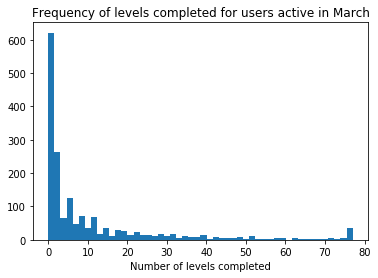

In [24]:
#dictionary of first level and last level successses
levelSuccess = dict()

for key, value in usersInfo.items():
    levelSuccess[key] =[] 
    
    lvls =[]
    for i in value:
        if isinstance(i, str):
            if i[0:6] == 'LevelS':
                lvls.append(i)
    lvls.sort(key=natural_keys)
    
    if not lvls:
        startLevel = "No level completed"
        endLevel = "No level completed"
        
    else:
        startLevel = lvls[0]
        endLevel = lvls[len(lvls)-1]
    
    levelSuccess[key].append(startLevel)
    levelSuccess[key].append(endLevel)

totalCompleted = dict()

for i in uniqueUsers:
    ignore= ('True' if levelSuccess.get(i) else 'False')

    if (ignore == 'False'):
        pass
    else:
        if (levelSuccess[i][0] == 'No level completed'):
            totalCompleted[i] = 0
        else:
            a = levelSuccess[i][0]
            b = levelSuccess[i][1]
            
            a1 = int(float(re.sub('[^0-9]','', a)))
            b1 = int(float(re.sub('[^0-9]','', b)))
            
    
            levelSuccess[i][0] = a1
            levelSuccess[i][1] = b1
            
            totalCompleted[i] = (b1-a1+1)

#histogram of users vs levels      
plt.hist(totalCompleted.values(), bins =50)
plt.title("Frequency of levels completed for users active in March")
plt.xlabel("Number of levels completed")

Text(0.5, 0, 'Level Failed')

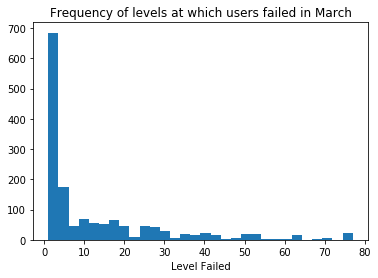

In [25]:
#dictionary of first and last level failures
levelFail = dict()
for key, value in usersInfo.items():
    levelFail[key] =[] 
    
    lvls =[]
    for i in value:
        if isinstance(i, str):
            if i[0:6] == 'LevelF':
                lvls.append(i)
    lvls.sort(key=natural_keys)
    
    if not lvls:
        startLevel = "No level Failed"
        endLevel = "No level Failed"
        
    else:
        startLevel = lvls[0]
        endLevel = lvls[len(lvls)-1]
    
    levelFail[key].append(startLevel)
    levelFail[key].append(endLevel)

for i in uniqueUsers:
    ignore= ('True' if levelSuccess.get(i) else 'False')

    if (ignore == 'False'):
        pass
    else:
        if (levelFail[i][0] == 'No level Failed'):
            pass
        else:
            a = levelFail[i][0]
            b = levelFail[i][1]
            
            a1 = int(float(re.sub('[^0-9]','', a)))
            b1 = int(float(re.sub('[^0-9]','', b)))
            
    
            levelFail[i][0] = a1
            levelFail[i][1] = b1

failed =[]
for i in levelFail.values():
    if (i == ['No level Failed', 'No level Failed']):
        pass
    else:
        if(failed.append(i[0]) == failed.append(i[1])):
            failed.append(i[0])
        else:
            failed.append(i[0])
            failed.append(i[1])
            

plt.hist(failed, bins =30)
plt.title("Frequency of levels at which users failed in March")
plt.xlabel("Level Failed")

In [26]:
######### find info for top user of the day
import operator
topUserID = max(totalCompleted.items(), key=operator.itemgetter(1))[0]
topUser = (gP.loc[gP['ID'] == topUserID])['StringValue'].tolist()

levels = []
for i in topUser:
    if isinstance(i, str):
        if i[0:6] == 'LevelS':
            levels.append(i)

levels.sort(key=natural_keys)
levels#gives all completed levels

['LevelSuccess_1',
 'LevelSuccess_2',
 'LevelSuccess_3',
 'LevelSuccess_4',
 'LevelSuccess_5',
 'LevelSuccess_6',
 'LevelSuccess_7',
 'LevelSuccess_8',
 'LevelSuccess_9',
 'LevelSuccess_10',
 'LevelSuccess_11',
 'LevelSuccess_12',
 'LevelSuccess_13',
 'LevelSuccess_14',
 'LevelSuccess_15',
 'LevelSuccess_16',
 'LevelSuccess_17',
 'LevelSuccess_18',
 'LevelSuccess_19',
 'LevelSuccess_20',
 'LevelSuccess_21',
 'LevelSuccess_22',
 'LevelSuccess_23',
 'LevelSuccess_24',
 'LevelSuccess_25',
 'LevelSuccess_26',
 'LevelSuccess_27',
 'LevelSuccess_28',
 'LevelSuccess_29',
 'LevelSuccess_30',
 'LevelSuccess_31',
 'LevelSuccess_32',
 'LevelSuccess_33',
 'LevelSuccess_34',
 'LevelSuccess_35',
 'LevelSuccess_36',
 'LevelSuccess_37',
 'LevelSuccess_38',
 'LevelSuccess_39',
 'LevelSuccess_40',
 'LevelSuccess_41',
 'LevelSuccess_42',
 'LevelSuccess_43',
 'LevelSuccess_44',
 'LevelSuccess_45',
 'LevelSuccess_46',
 'LevelSuccess_47',
 'LevelSuccess_48',
 'LevelSuccess_49',
 'LevelSuccess_50',
 'LevelSu

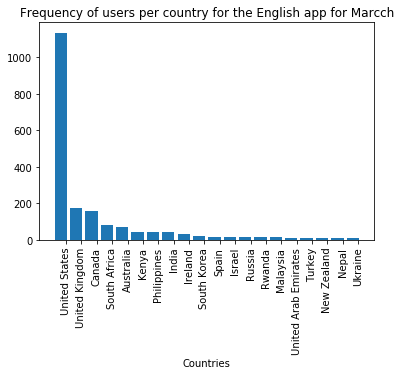

In [27]:
#hist of countries vs active user

userCountry = dict()

count = 0
while (count<len(uniqueUsers)):
    userCountry[uniqueUsers[count]] = ''
    count=count+1  
for i in uniqueUsers:
    if (userCountry[i]==''):
    
        found = False
        x =0
        while (not found):
            if (eD[x]['user_pseudo_id'] == i):
                userCountry[i] = eD[x]['geo']['country']
                found = True
            else:
                x =x+1

countryFreq = dict()               
for i in userCountry:
    if userCountry[i] not in countryFreq:
        countryFreq[userCountry[i]] = 1
    else:
        countryFreq[userCountry[i]] =  countryFreq[userCountry[i]] + 1

size = list(range(len(userCountry)))
delete = []
for i in countryFreq:
    if (countryFreq[i] < 10):
        pop =''
        delete.append(i)

size = list(range(len(delete)))

for i in size:
    del countryFreq[delete[i]]
 
from itertools import repeat
cF = []
for i in countryFreq:
    cF.extend(repeat(i, countryFreq[i]))
    

counts = Counter(cF)

labels, values = zip(*counts.items())

indSort = np.argsort(values)[::-1]

labels = np.array(labels)[indSort]
values = np.array(values)[indSort]

indexes = np.arange(len(labels))

bar_width = 0.35
plt.bar(indexes, values)
plt.xticks(indexes + bar_width, labels)
plt.tick_params(axis='x', labelrotation=90)
plt.title("Frequency of users per country for the English app for Marcch")
plt.xlabel("Countries")
plt.show()

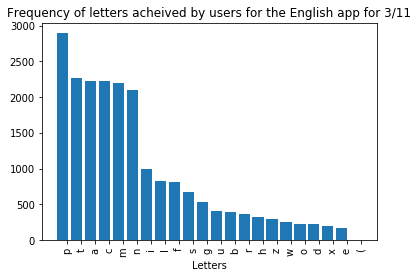

In [28]:
##################  
#hist of letters vs users
usersLetter = dict()

for user in usersInfo:
    usersLetter[user]=[]
    for i in usersInfo[user]:
        if (isinstance(i, str)):
            if i[0:13] == 'Puzzle Letter':
                letter = i[-1:]
                usersLetter[user].append(letter)
            if i[0:19] == 'Puzzle Sound Letter':
                letter = i[-1:]
                usersLetter[user].append(letter)

uLet = list(usersLetter.values())
uL=[]
for i in uLet:
    for j in i:
        uL.append(j)

counts = Counter(uL)

labels, values = zip(*counts.items())

indSort = np.argsort(values)[::-1]

labels = np.array(labels)[indSort]
values = np.array(values)[indSort]

indexes = np.arange(len(labels))

bar_width = 0.35
plt.bar(indexes, values)
plt.xticks(indexes + bar_width, labels)
plt.tick_params(axis='x', labelrotation=90)
plt.title("Frequency of letters acheived by users for the English app for 3/11")
plt.xlabel("Letters")
plt.show()



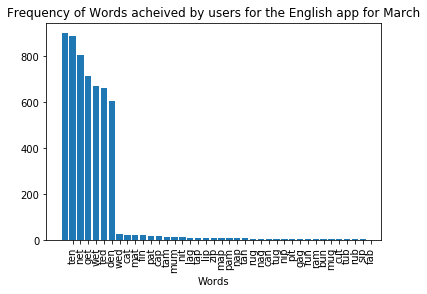

In [29]:
#hist of words vs users

usersWords = dict()


for user in usersInfo:
    usersWords[user]=[]
    for i in usersInfo[user]:
        if (isinstance(i, str)):
            if i[0:11] == 'Puzzle Word':
                word = i.split(": ", 1)[1]
                usersWords[user].append(word)
            if i[0:17] == 'Puzzle Sound Word':
                word = i.split(": ", 1)[1]
                usersWords[user].append(word)
                
                
wordsFreq = dict()               
for i in usersWords:
    for j in usersWords[i]:
        if j not in wordsFreq:
            wordsFreq[j] = 1
        else:
           wordsFreq[j] =  wordsFreq[j] + 1

size = list(range(len(usersWords)))
delete = []
for i in wordsFreq:
    if (wordsFreq[i] < 5):
        pop =''
        delete.append(i)

size = list(range(len(delete)))

for i in size:
    del wordsFreq[delete[i]]
 
from itertools import repeat
wF = []
for i in wordsFreq:
    wF.extend(repeat(i, wordsFreq[i]))

counts = Counter(wF)

labels, values = zip(*counts.items())

indSort = np.argsort(values)[::-1]

labels = np.array(labels)[indSort]
values = np.array(values)[indSort]

indexes = np.arange(len(labels))

bar_width = 1
plt.bar(indexes, values)
plt.xticks(indexes + bar_width, labels)
plt.tick_params(axis='x', labelrotation=90)
plt.title("Frequency of Words acheived by users for the English app for March")
plt.xlabel("Words")
plt.show()
        